# Visualize the empirical data

In [1]:
using CSV
using DataFrames
using CairoMakie
using Statistics

In [2]:
# load data
data = (
    top=CSV.read("emp-dataset/numpass-area-top.csv", DataFrame),
    sec=CSV.read("emp-dataset/numpass-area-2nd.csv", DataFrame)
)
println(size(data.top), ",\t", size(data.sec))

(59, 2),	(70, 2)


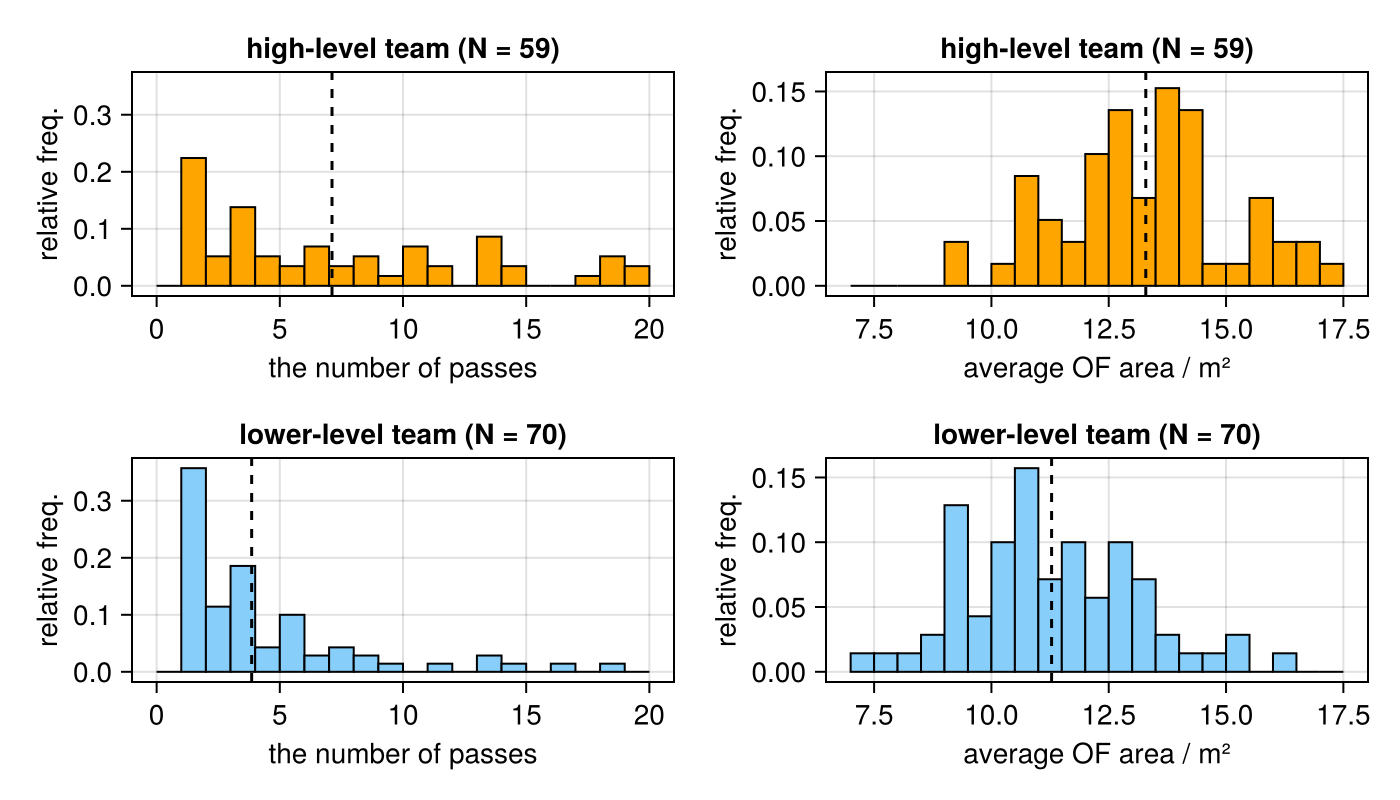

In [3]:
# create Figure
f = Figure(size=(700, 400))
# create Axes
lab_high = "high-level team (N = $(size(data.top, 1)))"
lab_lower = "lower-level team (N = $(size(data.sec, 1)))"
ylab = "relative freq."
ax_nptop = Axis(
    f[1, 1], title=lab_high, xlabel="the number of passes", ylabel=ylab
)
ax_npsec = Axis(
    f[2, 1], title=lab_lower, xlabel="the number of passes", ylabel=ylab
)
ax_matop = Axis(
    f[1, 2], title=lab_high, xlabel="average OF area / m²", ylabel=ylab
)
ax_masec = Axis(
    f[2, 2], title=lab_lower, xlabel="average OF area / m²", ylabel=ylab
)
# link x axes
linkaxes!(ax_nptop, ax_npsec)
linkaxes!(ax_matop, ax_masec)
# plot styles
histstyle = Dict(:strokewidth => 1, :normalization => :probability)
linesetting = Dict(:linestyle => :dash)
coltop, colsec = (:orange, :lightskyblue)
# get bin locations for OF area
area_binwidth = 0.5  # bin width
area_min = floor(minimum(
    vcat(data.top[:, "meanarea"], data.sec[:, "meanarea"])
) / area_binwidth) * area_binwidth
area_max = ceil(maximum(
    vcat(data.top[:, "meanarea"], data.sec[:, "meanarea"])
) / area_binwidth) * area_binwidth
area_bins = area_min:area_binwidth:area_max
# plot data
# - the number of passes: top
hm_nptop = hist!(
    ax_nptop, data.top[:, "passcount"], bins=0:20, 
    color=coltop; histstyle...
)
vlines!(ax_nptop, mean(data.top[:, "passcount"]), color=:black; linesetting...)
# - the number of passes: 2nd
hm_npsec = hist!(
    ax_npsec, data.sec[:, "passcount"], bins=0:20; 
    color=colsec, histstyle...
)
vlines!(ax_npsec, mean(data.sec[:, "passcount"]), color=:black; linesetting...)
# - OF area: top
hm_matop = hist!(
    ax_matop, data.top[:, "meanarea"]; color=coltop, bins=area_bins, histstyle...
)
vlines!(ax_matop, mean(data.top[:, "meanarea"]), color=:black; linesetting...)
# - OF area: 2nd
hm_masec = hist!(
    ax_masec, data.sec[:, "meanarea"]; color=colsec, bins=area_bins, histstyle...
)
vlines!(ax_masec, mean(data.sec[:, "meanarea"]), color=:black; linesetting...)
# save Figure
save("emp-histograms.pdf", f)
# show Figure
f